## 🎨 Generate MCA Villager Skin (Interactive Version)

MCA Rebornの村人と同様のスキンを**インタラクティブに**生成するツールです。

### 🆕 新機能
- **🎛️ インタラクティブ・ウィジェット**: 直感的なUIでパラメータを調整
- **🎲 ランダム生成ボタン**: 一回のクリックで全パラメータをランダム設定
- **🎯 リアルタイム・プレビュー**: パラメータ変更後すぐにスキン生成

### 📋 使い方
1. **インポートセル**を実行してライブラリを読み込み
2. **パラメータ設定ウィジェット**で好みの設定に調整
3. **「🎨 スキン生成」**ボタンをクリック
4. **残りのセルを順番に実行**して画像表示

### 🎛️ 調整可能なパラメータ
- **性別**: 男性・女性・ランダム
- **特性**: ヘテロクロミア（オッドアイ）・アルビノ
- **肌の色**: ヘモグロビン・メラニン値
- **髪の色**: ユーメラニン・フェオメラニン・RGBカスタムカラー

従来通りコードを直接編集して使用することも可能です。

### Import libs

In [1]:
from PIL import Image
from IPython.display import display
from classes.skin_info import SkinInfo
from classes.generate_villager_skin import GenerateVillagerSkin
import ipywidgets as widgets
from IPython.display import clear_output
import numpy as np

### Generate skin info

SkinInfoにパラメータを指定することで、スキンのパターンを部分的に固定化できます。<br>
(全パラメータを設定することで、スキンのパターンを完全に固定化することも可能です。)<br>
コメントアウトされた行を参考に設定してください。<br>

※指定できるパラメータは[Show detail skin info](#show-detail-skin-info)の出力を参照してください。

In [7]:
# パラメータ設定ウィジェット
print("🎛️ パラメータ設定ウィジェットを読み込み中...")

# 性別選択
gender_dropdown = widgets.Dropdown(
    options=[('ランダム', 0), ('男性', 1), ('女性', 2)],
    value=0,
    description='性別:',
    style={'description_width': 'initial'}
)

# 特性設定
hetero_checkbox = widgets.Checkbox(
    value=False,
    description='ヘテロクロミア（オッドアイ）'
)

albinism_checkbox = widgets.Checkbox(
    value=False,
    description='アルビノ'
)

# 肌の色設定
hemoglobin_slider = widgets.FloatSlider(
    value=0.5,
    min=0.0,
    max=1.0,
    step=0.01,
    description='ヘモグロビン:',
    style={'description_width': 'initial'}
)

melanin_slider = widgets.FloatSlider(
    value=0.5,
    min=0.0,
    max=1.0,
    step=0.01,
    description='メラニン:',
    style={'description_width': 'initial'}
)

# 髪の色設定
eumelanin_slider = widgets.FloatSlider(
    value=0.5,
    min=0.0,
    max=1.0,
    step=0.01,
    description='ユーメラニン:',
    style={'description_width': 'initial'}
)

pheomelanin_slider = widgets.FloatSlider(
    value=0.5,
    min=0.0,
    max=1.0,
    step=0.01,
    description='フェオメラニン:',
    style={'description_width': 'initial'}
)

# RGBカスタムカラー
hair_red_slider = widgets.IntSlider(
    value=128,
    min=0,
    max=255,
    description='髪の色(R):',
    style={'description_width': 'initial'}
)

hair_green_slider = widgets.IntSlider(
    value=128,
    min=0,
    max=255,
    description='髪の色(G):',
    style={'description_width': 'initial'}
)

hair_blue_slider = widgets.IntSlider(
    value=128,
    min=0,
    max=255,
    description='髪の色(B):',
    style={'description_width': 'initial'}
)

# 出力表示エリア
output_area = widgets.Output()

# ランダム生成ボタン
def randomize_params(button):
    gender_dropdown.value = 0  # ランダム
    hetero_checkbox.value = False
    albinism_checkbox.value = False
    hemoglobin_slider.value = np.random.uniform(0.0, 1.0)
    melanin_slider.value = np.random.uniform(0.0, 1.0)
    eumelanin_slider.value = np.random.uniform(0.0, 1.0)
    pheomelanin_slider.value = np.random.uniform(0.0, 1.0)
    hair_red_slider.value = np.random.randint(0, 256)
    hair_green_slider.value = np.random.randint(0, 256)
    hair_blue_slider.value = np.random.randint(0, 256)

random_button = widgets.Button(
    description='🎲 ランダム生成',
    button_style='info',
    tooltip='全パラメータをランダムに設定'
)

random_button.on_click(randomize_params)

# ウィジェットからパラメータを取得してSkinInfoを作成する関数
def create_skin_info_from_widgets():
    # ウィジェットから値を取得
    gender = gender_dropdown.value
    hetero = hetero_checkbox.value
    albinism = albinism_checkbox.value
    hemoglobin = hemoglobin_slider.value
    melanin = melanin_slider.value
    eumelanin = eumelanin_slider.value
    pheomelanin = pheomelanin_slider.value
    hair_blue = hair_blue_slider.value
    hair_green = hair_green_slider.value
    hair_red = hair_red_slider.value
    
    # パラメータ辞書を作成
    params = {}
    
    # 性別（ランダムでない場合のみ設定）
    if gender != 0:  # 0はランダム
        params["gender"] = gender
    
    # 特性
    params["hetero"] = hetero
    params["albinism"] = albinism
    
    # 肌の色パラメータ
    params["hemoglobin"] = hemoglobin
    params["melanin"] = melanin
    
    # 髪の色パラメータ
    params["eumelanin"] = eumelanin
    params["pheomelanin"] = pheomelanin
    params["hair_color_blue"] = hair_blue
    params["hair_color_green"] = hair_green
    params["hair_color_red"] = hair_red
    
    # SkinInfoインスタンスを作成
    return SkinInfo(**params)

# スキン生成関数
def generate_skin_with_widgets(button):
    with output_area:
        clear_output(wait=True)
        print("🎨 スキン生成中...")
        
        # ウィジェットからSkinInfoを作成
        global skin_info
        skin_info = create_skin_info_from_widgets()
        
        # スキン情報を生成
        skin_info.generate_skin_info()
        
        print("✅ スキン情報生成完了！")
        print(f"📋 生成されたスキン情報:")
        print(skin_info)
        
        return skin_info

# スキン生成ボタン
generate_button = widgets.Button(
    description='🎨 スキン生成',
    button_style='success',
    tooltip='設定したパラメータでスキンを生成'
)

# スキン生成ボタンのイベントハンドラを設定
generate_button.on_click(generate_skin_with_widgets)

# ウィジェットを表示
print("🎛️ パラメータ設定:")
display(widgets.VBox([
    gender_dropdown,
    widgets.HTML("<b>特性:</b>"),
    widgets.HBox([hetero_checkbox, albinism_checkbox]),
    widgets.HTML("<b>肌の色:</b>"),
    hemoglobin_slider,
    melanin_slider,
    widgets.HTML("<b>髪の色:</b>"),
    eumelanin_slider,
    pheomelanin_slider,
    hair_red_slider,
    hair_green_slider,
    hair_blue_slider,
    widgets.HTML("<br>"),
    widgets.HBox([random_button, generate_button])
]))

print("📋 生成結果:")
display(output_area)

🎛️ パラメータ設定ウィジェットを読み込み中...
🎛️ パラメータ設定:


📋 生成結果:


Output()

In [3]:
# スキン生成が完了しました！
# 👆 上のウィジェットで「スキン生成」ボタンを押すと、skin_info変数が自動的に生成されます。
# 📋 次に以下のセルを順番に実行して、 villager_skinを生成・表示してください。

### Generate villager skin

In [9]:
# このセルはウィジェットの「スキン生成」ボタンを押した後に実行してください
# skin_info変数がウィジェットによって生成されている必要があります

try:
    # skin_infoが存在するか確認
    if 'skin_info' in globals() and skin_info is not None:
        skin_generator = GenerateVillagerSkin(skin_info)
        villager_skin = skin_generator.generate()
        print("✅ スキン画像の生成が完了しました！")
    else:
        print("❌ skin_infoが見つかりません。")
        print("👆 上のウィジェットで「スキン生成」ボタンを先に押してください。")
        
except NameError:
    print("❌ skin_infoが定義されていません。")
    print("👆 上のウィジェットで「スキン生成」ボタンを先に押してください。")
except Exception as e:
    print(f"❌ エラーが発生しました: {e}")
    print("🔧 ウィジェットでスキン情報を正しく生成し直してください。")

✅ スキン画像の生成が完了しました！


### Show villager skin (Original size & 4x size)

🎨 生成されたスキン画像:


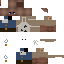

🔍 4倍サイズで詳細表示:


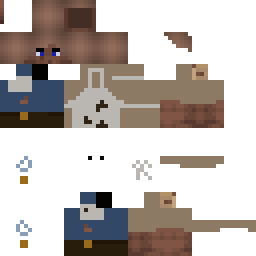

💾 画像を保存する場合は以下のコードを実行してください:
villager_skin.save('custom_villager_skin.png')


In [10]:
# 生成されたスキン画像を表示（4倍サイズも表示）

try:
    if 'villager_skin' in globals() and villager_skin is not None:
        print("🎨 生成されたスキン画像:")
        display(villager_skin)
        
        print("🔍 4倍サイズで詳細表示:")
        size = (villager_skin.size[0] * 4, villager_skin.size[1] * 4)
        display(villager_skin.resize(size, Image.NEAREST))
        
        print("💾 画像を保存する場合は以下のコードを実行してください:")
        print("villager_skin.save('custom_villager_skin.png')")
        
    else:
        print("❌ villager_skinが見つかりません。")
        print("📋 上のセルを先に実行してスキン画像を生成してください。")
        
except NameError:
    print("❌ villager_skinが定義されていません。")
    print("📋 上のセルを先に実行してスキン画像を生成してください。")
except Exception as e:
    print(f"❌ エラーが発生しました: {e}")

### Show detail skin info

In [6]:
# スキンの詳細パラメータ情報を表示

try:
    if 'skin_info' in globals() and skin_info is not None:
        print("📋 スキンの詳細パラメータ情報:")
        display(skin_info.to_dataframe())
        
        print("\n🎯 主なパラメータの意味:")
        print("• gender: 性別 (1=男性, 2=女性)")
        print("• hetero: ヘテロクロミア（オッドアイ）")
        print("• albinism: アルビノ")
        print("• hemoglobin/melanin: 肌の色を決定する要素")
        print("• eumelanin/pheomelanin: 髪の色を決定する要素")
        print("• hair_color_*: 髪のRGBカスタムカラー")
        
    else:
        print("❌ skin_infoが見つかりません。")
        print("👆 上のウィジェットで「スキン生成」ボタンを先に押してください。")
        
except NameError:
    print("❌ skin_infoが定義されていません。")
    print("👆 上のウィジェットで「スキン生成」ボタンを先に押してください。")
except Exception as e:
    print(f"❌ エラーが発生しました: {e}")

❌ skin_infoが見つかりません。
👆 上のウィジェットで「スキン生成」ボタンを先に押してください。
